<a href="https://colab.research.google.com/github/meghavarshini/useful_random_code/blob/main/HPC_Intro/HPC_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HPC Introduction

## Why should I use HPC?
- If you work with large datasets and run data management pipelines
- If your research uses machine or deep learning architectures
- If you need a lot of compute time
- In these cases, your system may not be powerful enough, and commercial software (such as Google Colab or AWS) will be too expensive

## How do I access the HPC recources?
You can access HPC with your UArizona student ID via the HPC Dashboard:

[HPC Dashboard](https://ood.hpc.arizona.edu/pun/sys/dashboard)     |     [HPC Documentation](https://uarizona.atlassian.net/wiki/spaces/UAHPC/overview?homepageId=75988994)

## HPC Portals

HPC web interface includes:
  - Shell access (light, fast)
  - A file browser and a graphical desktop (easy to use but slow)
  - An application launcher (large overhead)
  
You can access the Account management portal which lets you manage your account and request services



### Interactive Sessions
HPC offers a couple options for researcher to interact with their data and code on the HPC.

#### **Launching a terminal through the portal**

You can use shell access to:
  - Check your directory
  - Query your resource allocations
  - Submit jobs with slurm



#### **Launching an HPC session**
Use the On Demand console to input your requirements and join the HPC queue

  - Enter your requirements in the form
  - Wait in queue
  - Launch the session
  - Deleting session early to save your allocation



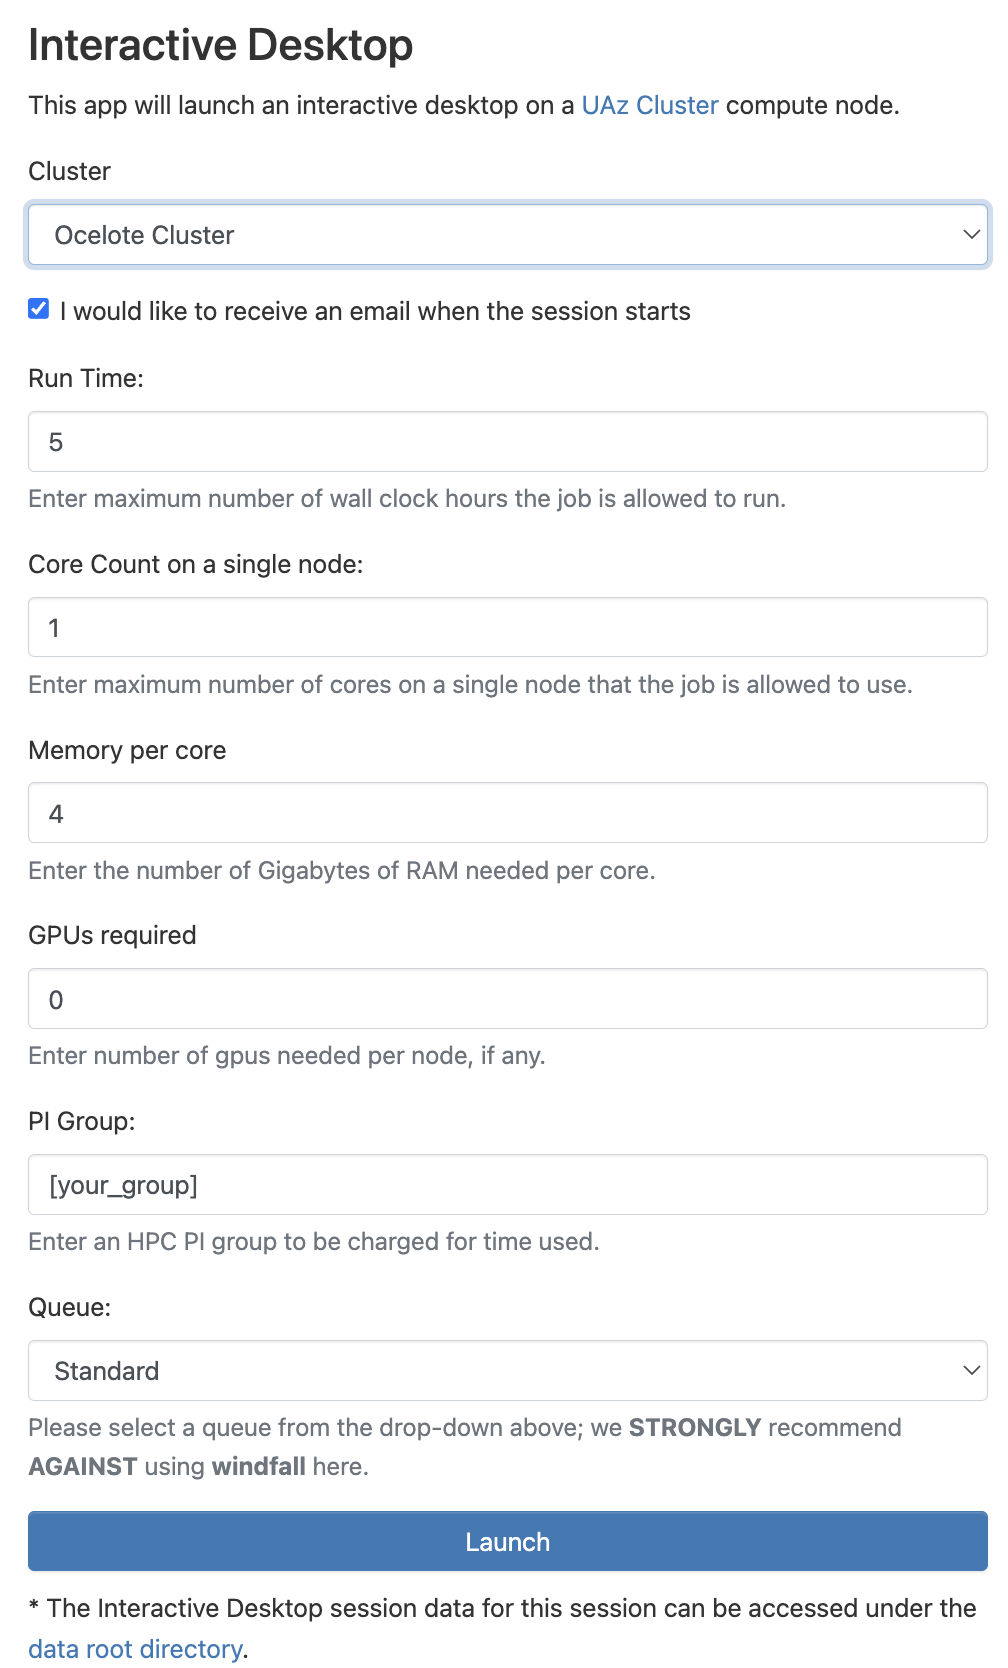

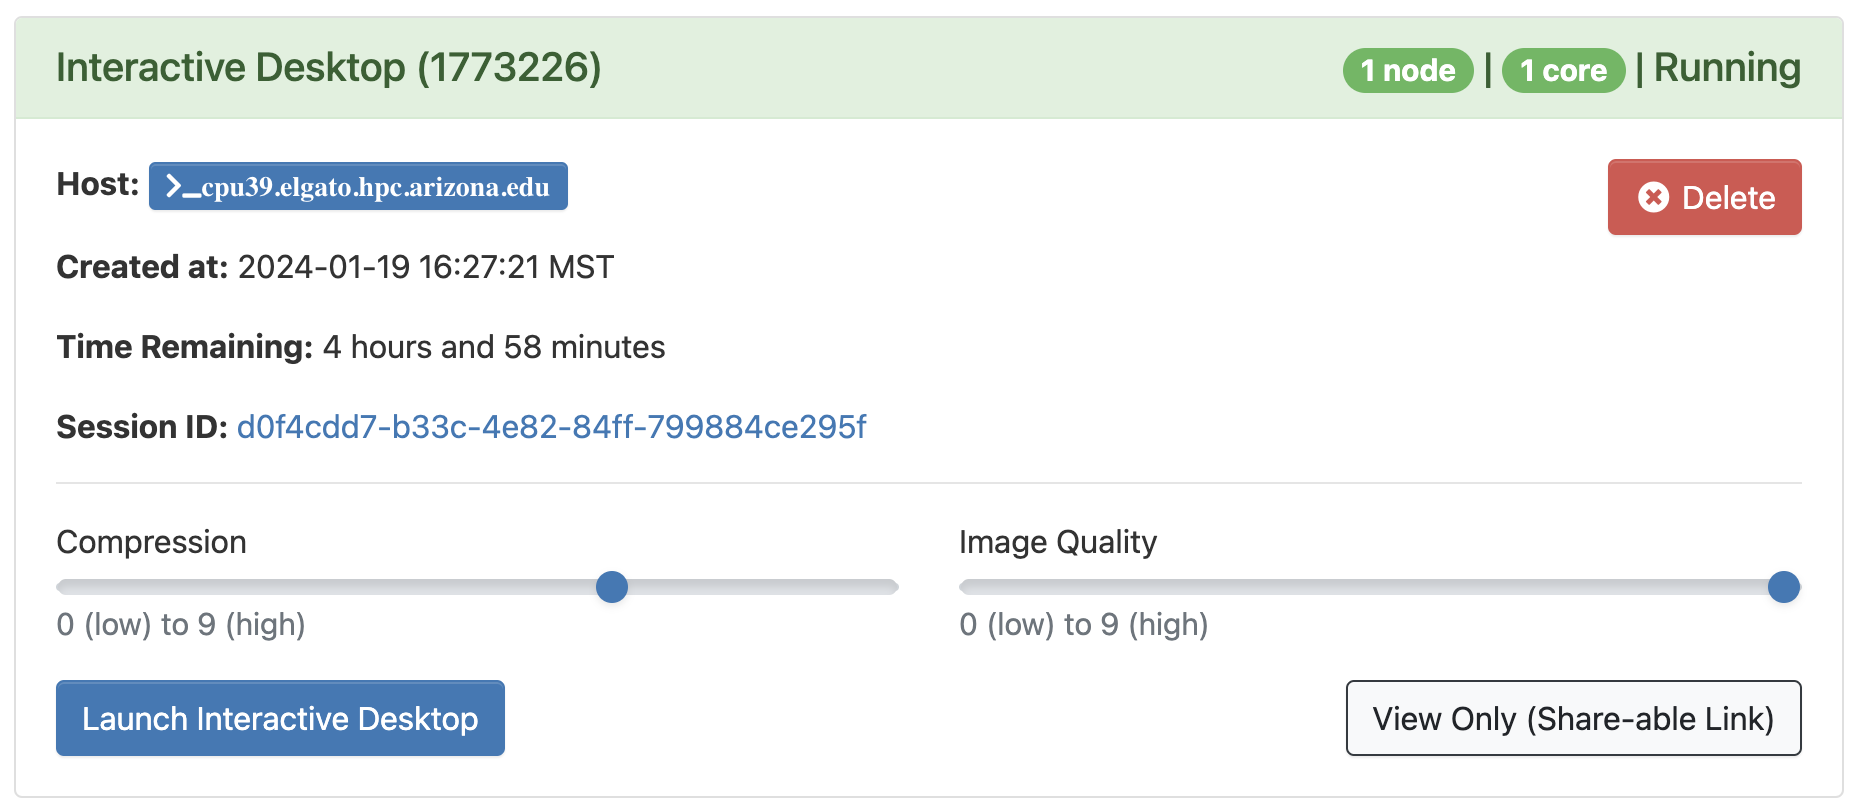

#### **Launching a Jupyter Notebook**
- Same as launching an Interactive Desktop
- Good for writing and interactively executing code
- Heavy overload, so best to avoid
- When opening, shows the familiar Jupyter interface

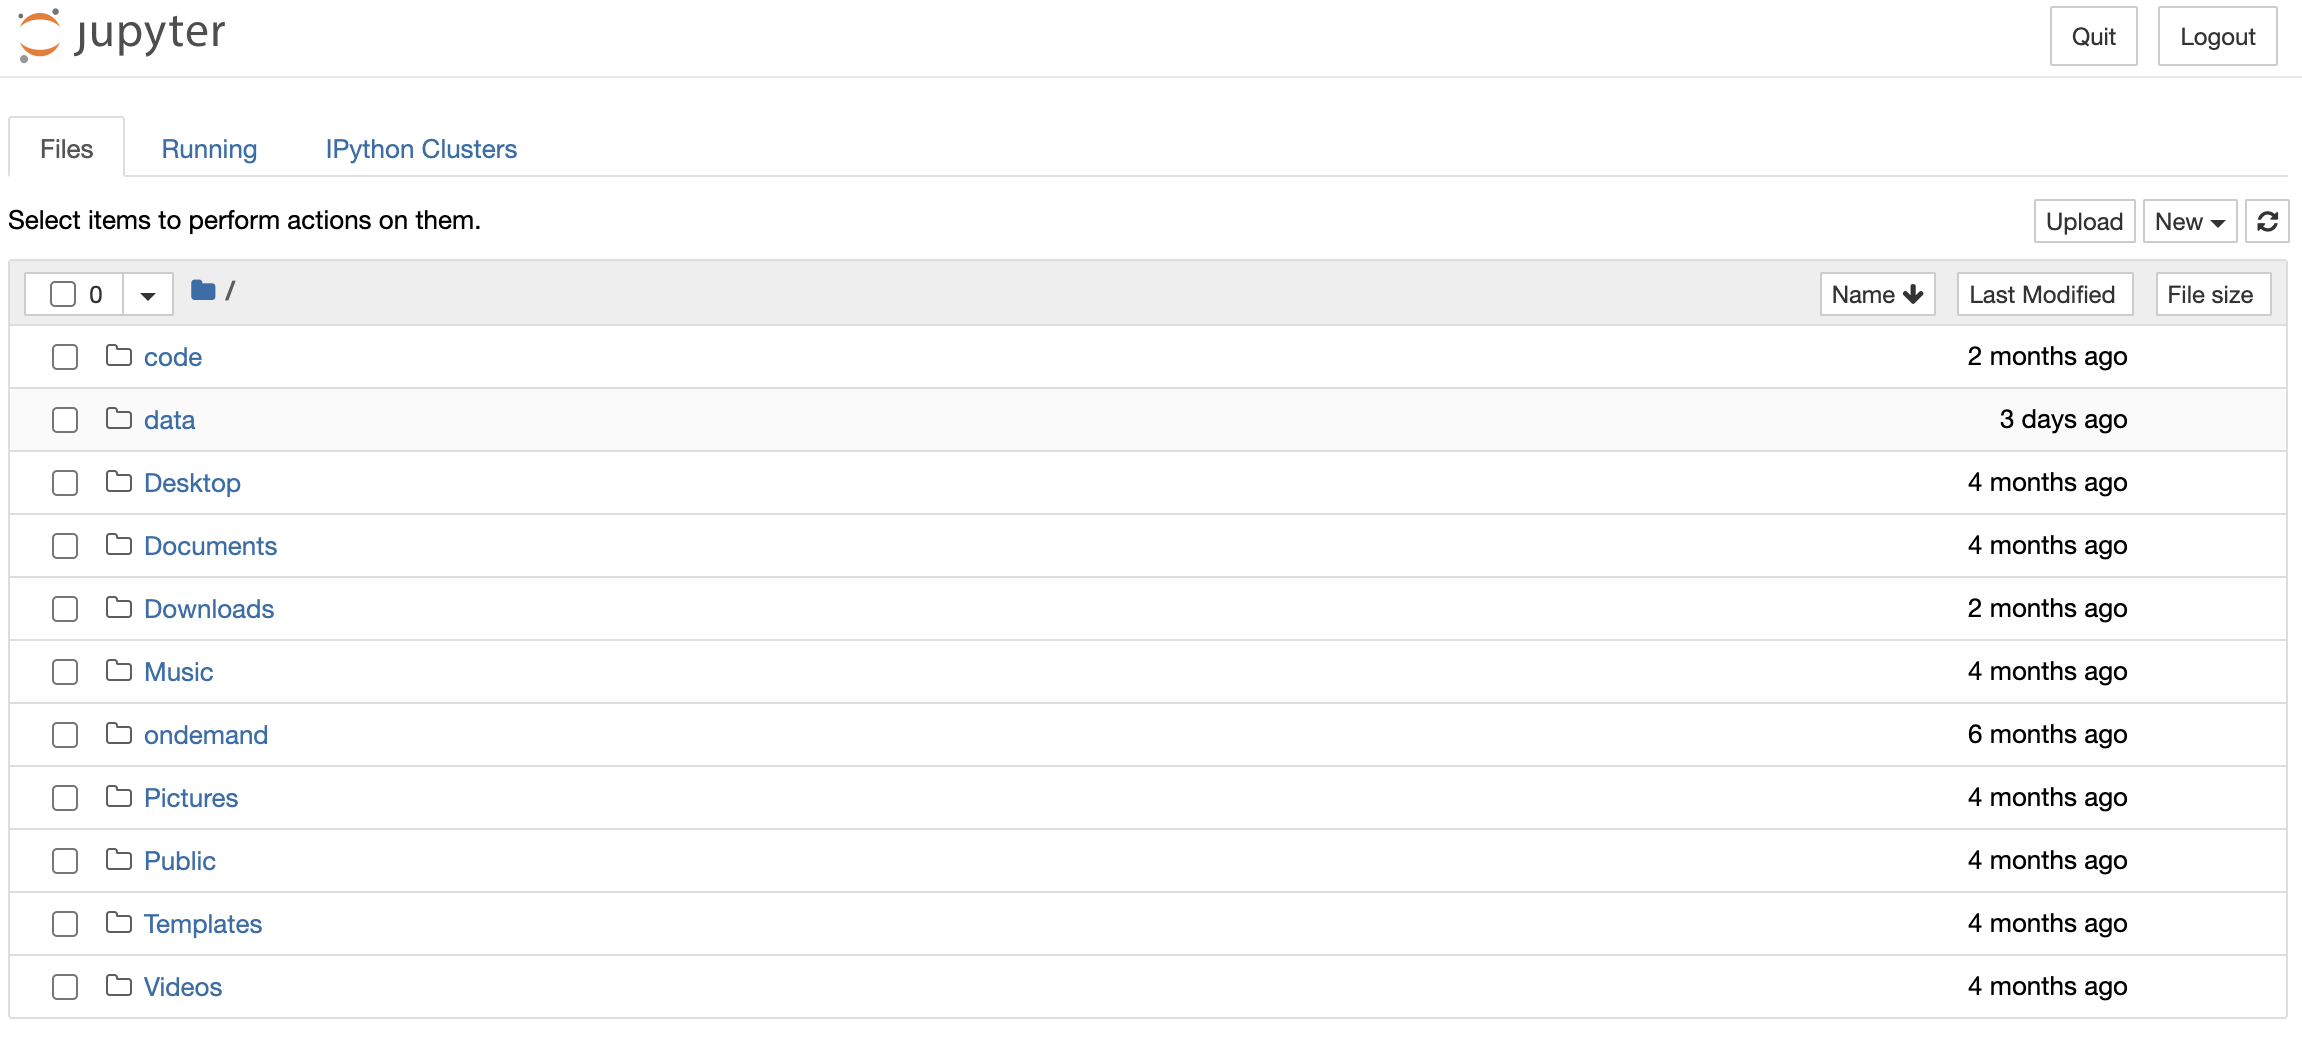

### Accessing Your Files

You can add and send out files from the HPC with most existing protocols.



#### **MyFiles Interface**
- Can be used to drag and drop files.
- This is easy and intuitive, but slow and manual
- Accessing your storage spaces:
  - Personal disk (50GB)
  - Group Disk (if applicable)
  - XDisk (if applicable)



#### Copying files from the web with `wget`
- Linux utility for downloading files from the web
- Supports HTTP, HTTPS, and FTP protocols
- Once started, the user can log off without interrupting the download
- Syntax: `wget [OPTION] … [URL] …`
- Useful options
  - `-h` displays syntax, condensed list of options
  - `-b` run in the background, allowing you to enter more commands while the download runs

#### Uploading and downloading files from your system using `scp`
Secure Transfer Protocol is a good way to authenticate users and securely transfer files to and from HPC.

Syntax for uploading a file:
```
scp -rp filenameordirectory NetId@filexfer.hpc.arizona.edu:subdirectory
```

Syntax for downloading a file:

```
scp -rp NetId@filexfer.hpc.arizona.edu:filenameordirectory .
```

For more information, see https://uarizona.atlassian.net/wiki/spaces/UAHPC/pages/75989133/Transferring+Data

## What are my allocations?

HPC has space limits and processing limits. In order to make sure your processes will be successful, there are two allocations you need to periodically check:

- Your allotted compute time `uquota`
- Your storage `va`

# Containers and Apptainer (or Singularity)

#### What is a container?
A container is a packaged unit of software that contains code and all its dependencies including, but not limited to: system tools, libraries, settings, and data. By running a container, a user can essentially run a copy of the author’s system, with the same setup and behaviour.

#### Why do I need it?
Containers make software portable and reproducible, allowing for a consistent environment that can run on multiple platforms and different systems.

#### How do I use it?
Docker is widely used by researchers for authoring, managing and running containers: https://www.docker.com/


#### Apptainers
Apptainer (formerly Singularity) makes containers useable on the HPC by completely containing the authority so that all privileges needed at runtime stay inside the container. This makes it ideal for the shared environment of a supercomputer.

Even better, a Docker image can be encapsulated inside an Apptainer image.

Some ideal use cases that can be supported by Apptainer on HPC:
- You already use Docker and want to run your jobs on HPC.
- You want to preserve your environment so a system change will not affect your work.
- You need newer or different libraries than are offered on the system.
- Someone else developed a workflow using a different version of Linux.
- You prefer to use a Linux distribution other than CentOS (e.g. Ubuntu).
- You want a container with a database server like MariaDB.

For more information about containers, see: https://uarizona.atlassian.net/wiki/spaces/UAHPC/pages/75990594/Containers



# Slurm

Material is adapted from the Confluence documents for UA's HPC. For further information on running jobs with Slurm, please visit their [documentation](https://uarizona.atlassian.net/wiki/spaces/UAHPC/pages/75989875/Running+Jobs+with+Slurm#RunningJobswithSlurm-batch-directivesBatchJobDirectives).

Slurm: Simple Linux Utility for Resource Management. For the UA's HPC, slurm manages how the jobs submitted by various researchers are distributed across all of the compute nodes provided by Puma, Ocelote, and El Gato.

In the following video, Chris Reidy gives a good tour of a physical core and relates that to the terminology that slurm uses: https://www.youtube.com/watch?v=_dpbUqZ7rRk

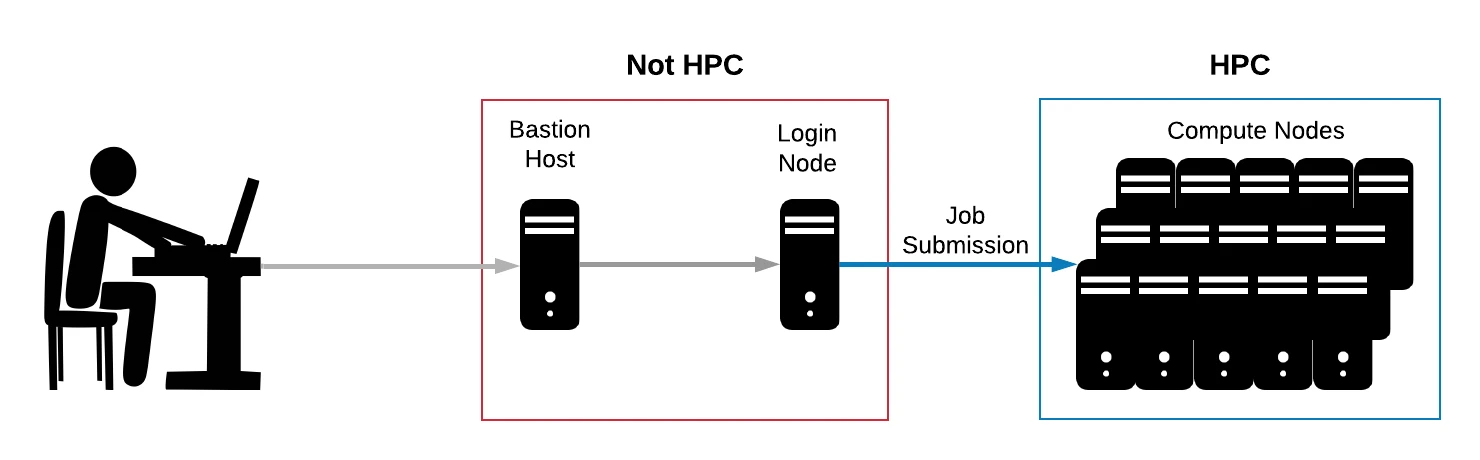

Below is an example slurm script that you can adapt to your own needs. In the following examples, it is referred to as hello_world.slurm.

In [ ]:
#!/bin/bash

# --------------------------------------------------------------
### PART 1: Requests resources to run your job.
# --------------------------------------------------------------
### Optional. Set the job name.
#SBATCH --job-name=hello_world
### Optional. Set the output filename.
### SLURM reads %x as the job name and %j as the job ID.
#SBATCH --output=%x-%j.out
### REQUIRED. Specify the PI group for this job. Replace <PI GROUP> with your own group.
#SBATCH --account=<PI GROUP>
### REQUIRED. Set the partition for your job. This is a job queue.
#SBATCH --partition=standard
### REQUIRED. Set the number of compute nodes.
#SBATCH --nodes=1
### REQUIRED. Set the number of CPUs that will be used for this job.
#SBATCH --ntasks=1
### REQUIRED. Set the memory required for this job.
#SBATCH --mem-per-cpu=6gb
### Optional. Request a GPU for the job.
#SBATCH --gres=gpu:1
### REQUIRED. Specify the time required for this job, hh:mm:ss.
### Don't underestimate - when the time elapses, it will kill your job.
### But don't overestimate too much. Longer jobs may wait longer in the queue.
#SBATCH --time=00:01:00
### Optional. Request email notification when a job begins, ends, fails, or all.
#SBATCH --mail-type=BEGIN|END|FAIL|ALL
### Optional. Provide email for above.
#SBATCH --mail-user=netid@arizona.edu

# --------------------------------------------------------------
### PART 2: Executes bash commands to run your job.
### These are the commands that will run on the compute node.
# --------------------------------------------------------------
### Load required modules/libraries if needed
module load python/3.9

### change to your script’s directory
cd ~/hello_world

### Run your work
python3 hello_world.py
sleep 10

Use the command `sbatch` to submit your job. Slurm will schedule your job alongside all of the other jobs that have been submitted, and inform you of the job number so that you can query its status.

In [ ]:
[netid@gpu66 hello_world]$ sbatch hello_world.slurm
Submitted batch job 807387

The command `squeue` will provide information about scheduled jobs. Invoking `squeue` without further arguments will return information about every job in the queue. To query a specific job by job id, use `squeue --job [job_id]`.

In [ ]:
[netid@gpu66 hello_world]$ squeue --job 807387
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            807387  standard hello_wo    netid PD       0:06      1 gpu66

You can also use `grep`, a utility which searches for pattern matches in text, to search the output of `squeue` for a specific pattern, such as your username. It will return lines where the pattern is matched.

In [ ]:
squeue | grep [username]

# Additional Support

## Data Lab Office Hours
- In-person: Science and Engineering Building Room 212, Zoom: https://arizona.zoom.us/j/86423223879
- Every Monday, 3-4pm
- Every Wednesday, 2-3pm

## UA DataScience Slack Workspace
- uadatascience.slack.com #datalab-chatter
